<a href="https://colab.research.google.com/github/paveena703/Customer-Lifetime-Value-Prediction./blob/main/Customer_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
file_path = "/content/online_retail_II customer.xlsx"
df = pd.read_excel(file_path, sheet_name="Year 2010-2011")

In [9]:
# Drop missing Customer IDs and cancelled orders
df = df.dropna(subset=['Customer ID'])
df = df[~df['Invoice'].astype(str).str.startswith('C')]
# Add a total price column
df['TotalPrice'] = df['Quantity'] * df['Price']

In [10]:
# Group by Customer ID
customer_df = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'TotalPrice': 'sum',
    'InvoiceDate': ['min', 'max']
}).reset_index()
# Customer Age in days
customer_df.columns = ['CustomerID', 'TotalTransactions', 'TotalRevenue', 'FirstPurchase', 'LastPurchase']
customer_df['CustomerAge'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days + 1
# Average Order Value (AOV)
customer_df['AOV'] = customer_df['TotalRevenue'] / customer_df['TotalTransactions']
# Purchase Frequency (how often a customer buys)
total_customers = customer_df.shape[0]
customer_df['PurchaseFrequency'] = customer_df['TotalTransactions'] / total_customers
# Calculate CLV = AOV × Purchase Frequency × Customer Ag
customer_df['CLV'] = customer_df['AOV'] * customer_df['PurchaseFrequency'] * customer_df['CustomerAge']

In [11]:
X = customer_df[['AOV', 'PurchaseFrequency', 'CustomerAge']]
y = customer_df['CLV']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 670.05


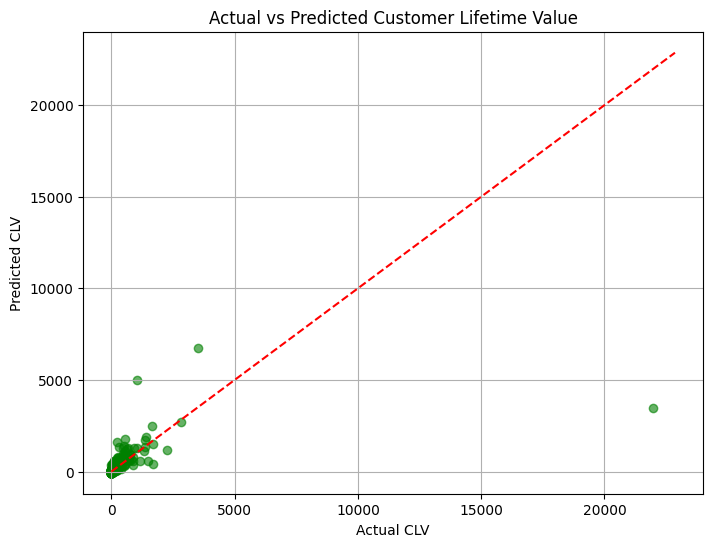

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()